In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the CSV file
data = pd.read_csv("BC-Data-Set.csv")

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4223 entries, 0 to 4222
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4223 non-null   object 
 1   BC      4223 non-null   float64
 2   N_CPC   4223 non-null   float64
 3   PM-10   4223 non-null   float64
 4   PM-2.5  4223 non-null   float64
 5   PM-1.0  4223 non-null   float64
 6   NO2     4223 non-null   float64
 7   O3      4223 non-null   float64
 8   SO2     4223 non-null   float64
 9   CO      4223 non-null   float64
 10  NO      4223 non-null   float64
 11  NOX     4223 non-null   float64
 12  TEMP    4223 non-null   float64
 13  HUM     4223 non-null   float64
dtypes: float64(13), object(1)
memory usage: 462.0+ KB


In [23]:
#mean of data
import pandas as pd
mean_values = data.mean()
print(mean_values)

BC         1.309454
N_CPC     13.651880
PM-10     15.132366
PM-2.5     9.302461
PM-1.0     7.259924
NO2       30.032402
O3        48.139158
SO2        1.368459
CO         0.312924
NO         7.796788
NOX       41.608059
TEMP      17.833411
HUM       70.848520
dtype: float64


/var/folders/dz/vjzgtvsn0dv9v9r8s48fg1t00000gn/T/ipykernel_13028/850683501.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = data.mean()


In [24]:
data

,date,BC,N_CPC,PM-10,PM-2.5,PM-1.0,NO2,O3,SO2,CO,NO,NOX,TEMP,HUM
0,2019-01-01 00:00:00,3.445,17.773,13.033,11.767,11.050,18.0,41.0,1.0,0.2,4.0,23.0,12.140,53.780
1,2019-01-01 01:00:00,5.162,24.620,17.050,15.533,14.783,62.0,1.0,1.0,0.2,22.0,96.0,11.683,55.100
2,2019-01-01 02:00:00,2.951,17.700,11.417,10.367,9.850,68.0,1.0,1.0,0.2,42.0,132.0,11.683,53.433
3,2019-01-01 03:00:00,1.917,12.212,7.750,7.100,6.683,75.0,1.0,1.0,0.2,66.0,176.0,11.367,54.533
4,2019-01-01 04:00:00,2.462,11.178,8.317,7.650,7.167,63.0,1.0,1.0,0.2,27.0,103.0,10.867,57.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,2019-12-10 19:00:00,0.728,9.275,7.300,5.267,3.267,30.0,57.0,1.0,0.2,2.0,33.0,22.033,93.367
4219,2019-12-10 20:00:00,0.787,9.420,7.500,5.467,3.417,37.0,46.0,1.0,0.2,1.0,38.0,22.100,93.317
4220,2019-12-10 21:00:00,1.056,9.296,7.233,5.283,3.200,16.0,67.0,1.0,0.2,1.0,17.0,22.200,93.333
4221,2019-12-10 22:00:00,0.804,9.504,7.667,5.450,3.133,15.0,68.0,1.0,0.2,1.0,16.0,22.183,93.417


In [25]:
# Convert the date column to a datetime object
data['date'] = pd.to_datetime(data['date'])

# Remove any missing values
data = data.dropna()

In [26]:
# Set the date column as the index of the DataFrame
data = data.set_index('date')

# Identify and highlight outliers using the z-score method
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers = np.where(z_scores > 3)  # Set the threshold to 3 to identify outliers

In [27]:

# Assuming your DataFrame is named 'data' and the datetime index is named 'datetime_index'

# Count the number of unique hours for each date
hours_per_day = data.groupby(data.index.date).size()

print(hours_per_day)

# Get the dates that have less than 24 unique hours
incomplete_days = hours_per_day[hours_per_day < 24].index

print(incomplete_days)

# Convert the incomplete_days array to a DatetimeIndex
date_index = pd.DatetimeIndex(data.index.date)

# Filter the DataFrame to exclude the rows corresponding to incomplete days
data_complete_days = data[~date_index.isin(incomplete_days)]

data_incomplete_days = data[date_index.isin(incomplete_days)]


2019-01-01    24
2019-01-02    24
2019-01-03    24
2019-01-04    24
2019-01-08    24
              ..
2019-12-02    24
2019-12-03    22
2019-12-04    13
2019-12-09    24
2019-12-10    24
Length: 191, dtype: int64
Index([2019-01-17, 2019-01-23, 2019-01-24, 2019-01-29, 2019-01-31, 2019-02-02,
       2019-02-08, 2019-02-10, 2019-02-14, 2019-02-25, 2019-02-26, 2019-02-27,
       2019-02-28, 2019-03-01, 2019-03-02, 2019-03-09, 2019-03-10, 2019-03-26,
       2019-03-31, 2019-04-01, 2019-04-02, 2019-04-03, 2019-04-11, 2019-04-15,
       2019-04-17, 2019-05-01, 2019-05-02, 2019-05-11, 2019-07-01, 2019-07-02,
       2019-07-03, 2019-07-10, 2019-07-23, 2019-07-26, 2019-07-27, 2019-07-30,
       2019-08-02, 2019-08-04, 2019-08-10, 2019-08-22, 2019-08-29, 2019-09-04,
       2019-09-10, 2019-09-13, 2019-09-27, 2019-10-15, 2019-10-16, 2019-10-21,
       2019-10-23, 2019-10-27, 2019-11-02, 2019-12-03, 2019-12-04],
      dtype='object')



def replace_with_mean(df, row_index):
    """
    Replace a value in a DataFrame with the mean of the previous and next values in the same row.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        row_index (int): The index of the row to update.
        column_index (int): The index of the column to update.

    Returns:
        pandas.DataFrame: The updated DataFrame.
    """
    previous_value = df.iloc[row_index, column_index-1]
    next_value = df.iloc[row_index, column_index+1]
    mean_value = (previous_value + next_value) / 2

    df.iloc[row_index, column_index] = mean_value
    return df


In [28]:
test= data.groupby([data.index.date])
for group_name, group_data in test:
    if len(group_data)!=24:
        existing_hours=group_data.index.hour.unique()
        missing_hours = set(range(24)) - set(existing_hours)
        missing_rows = pd.DataFrame(columns=group_data.columns)
        for missing_hour in missing_hours:
            datetime_obj = pd.to_datetime(group_data.index.date[0]) + pd.to_timedelta(missing_hour, unit='H')
            
            if (datetime_obj - pd.Timedelta(hours=1) in data.index):
                data.loc[datetime_obj] = (mean_values + data.loc[datetime_obj-pd.Timedelta(hours=1)]) / 2
                        
            elif (datetime_obj + pd.Timedelta(hours=1) in data.index):
                data.loc[datetime_obj] = (mean_values + data.loc[datetime_obj+pd.Timedelta(hours=1)]) / 2
                
            elif(datetime_obj + pd.Timedelta(hours=1) not in data.index) and (datetime_obj - pd.Timedelta(hours=1) not in data.index):
                data.loc[datetime_obj] = mean_values

            else:
                data.loc[datetime_obj] = (data.loc[datetime_obj-pd.Timedelta(hours=1)] + data.loc[datetime_obj+pd.Timedelta(hours=1)]) / 2

/var/folders/dz/vjzgtvsn0dv9v9r8s48fg1t00000gn/T/ipykernel_13028/4096456042.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group_name, group_data in test:


In [29]:
data=data.sort_index()
data

,BC,N_CPC,PM-10,PM-2.5,PM-1.0,NO2,O3,SO2,CO,NO,NOX,TEMP,HUM
date,,,,,,,,,,,,,
2019-01-01 00:00:00,3.445,17.773,13.033,11.767,11.050,18.0,41.0,1.0,0.2,4.0,23.0,12.140,53.780
2019-01-01 01:00:00,5.162,24.620,17.050,15.533,14.783,62.0,1.0,1.0,0.2,22.0,96.0,11.683,55.100
2019-01-01 02:00:00,2.951,17.700,11.417,10.367,9.850,68.0,1.0,1.0,0.2,42.0,132.0,11.683,53.433
2019-01-01 03:00:00,1.917,12.212,7.750,7.100,6.683,75.0,1.0,1.0,0.2,66.0,176.0,11.367,54.533
2019-01-01 04:00:00,2.462,11.178,8.317,7.650,7.167,63.0,1.0,1.0,0.2,27.0,103.0,10.867,57.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-10 19:00:00,0.728,9.275,7.300,5.267,3.267,30.0,57.0,1.0,0.2,2.0,33.0,22.033,93.367
2019-12-10 20:00:00,0.787,9.420,7.500,5.467,3.417,37.0,46.0,1.0,0.2,1.0,38.0,22.100,93.317
2019-12-10 21:00:00,1.056,9.296,7.233,5.283,3.200,16.0,67.0,1.0,0.2,1.0,17.0,22.200,93.333


In [30]:
data.to_csv("filled_mean.csv")

In [31]:
data.describe()

,BC,N_CPC,PM-10,PM-2.5,PM-1.0,NO2,O3,SO2,CO,NO,NOX,TEMP,HUM
count,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000
mean,1.309108,13.661508,15.158237,9.301489,7.257332,30.106000,48.070346,1.370919,0.313534,7.915068,41.861151,17.834635,70.795347
std,1.078665,7.922617,13.711135,5.860873,5.274505,20.964324,25.101155,0.769465,0.203886,17.941212,43.866719,5.888538,14.583073
min,0.110000,1.376000,0.600000,0.500000,0.333000,2.000000,1.000000,0.500000,0.100000,0.500000,1.000000,4.083000,19.383000
25%,0.682000,8.003000,8.985137,5.317000,3.383000,15.000000,32.000000,1.000000,0.200000,1.000000,18.000000,13.050000,61.500000
50%,1.031000,12.175500,13.475000,8.333000,6.233000,25.000000,48.138797,1.000000,0.200000,3.000000,30.000000,17.724305,70.860193
75%,1.452750,17.009250,17.954250,11.600000,9.217000,38.000000,63.000000,1.526344,0.312924,7.000000,47.000000,22.367000,82.158250
max,12.767000,73.490000,398.717000,76.833000,34.383000,132.000000,142.000000,13.000000,1.900000,255.000000,521.000000,34.983000,100.000000


In [32]:
correlations = data.corr()
bc_correlations = correlations['BC']
print(bc_correlations)

BC        1.000000
N_CPC     0.514447
PM-10     0.332796
PM-2.5    0.505249
PM-1.0    0.496600
NO2       0.494610
O3       -0.353426
SO2       0.058842
CO        0.260464
NO        0.367229
NOX       0.467224
TEMP     -0.016725
HUM       0.129694
Name: BC, dtype: float64


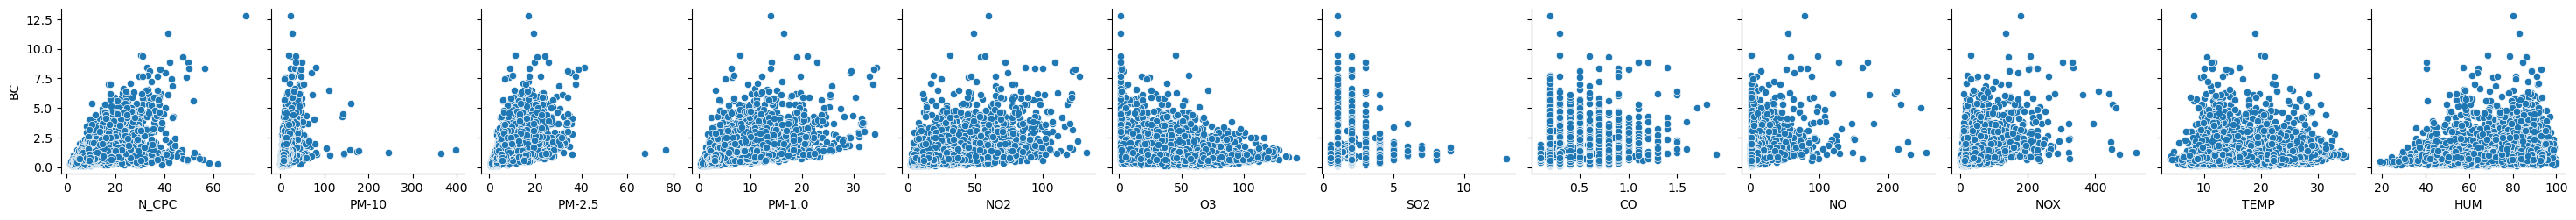

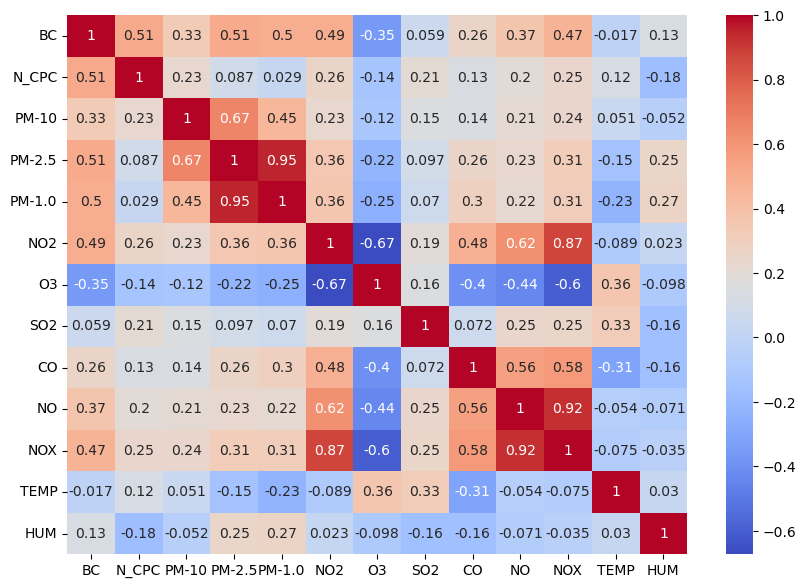

In [33]:
# Scatter plots
sns.pairplot(data, x_vars=data.columns[1:], y_vars=['BC'])

# Heat map
plt.figure(figsize=(10, 7))
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.show()

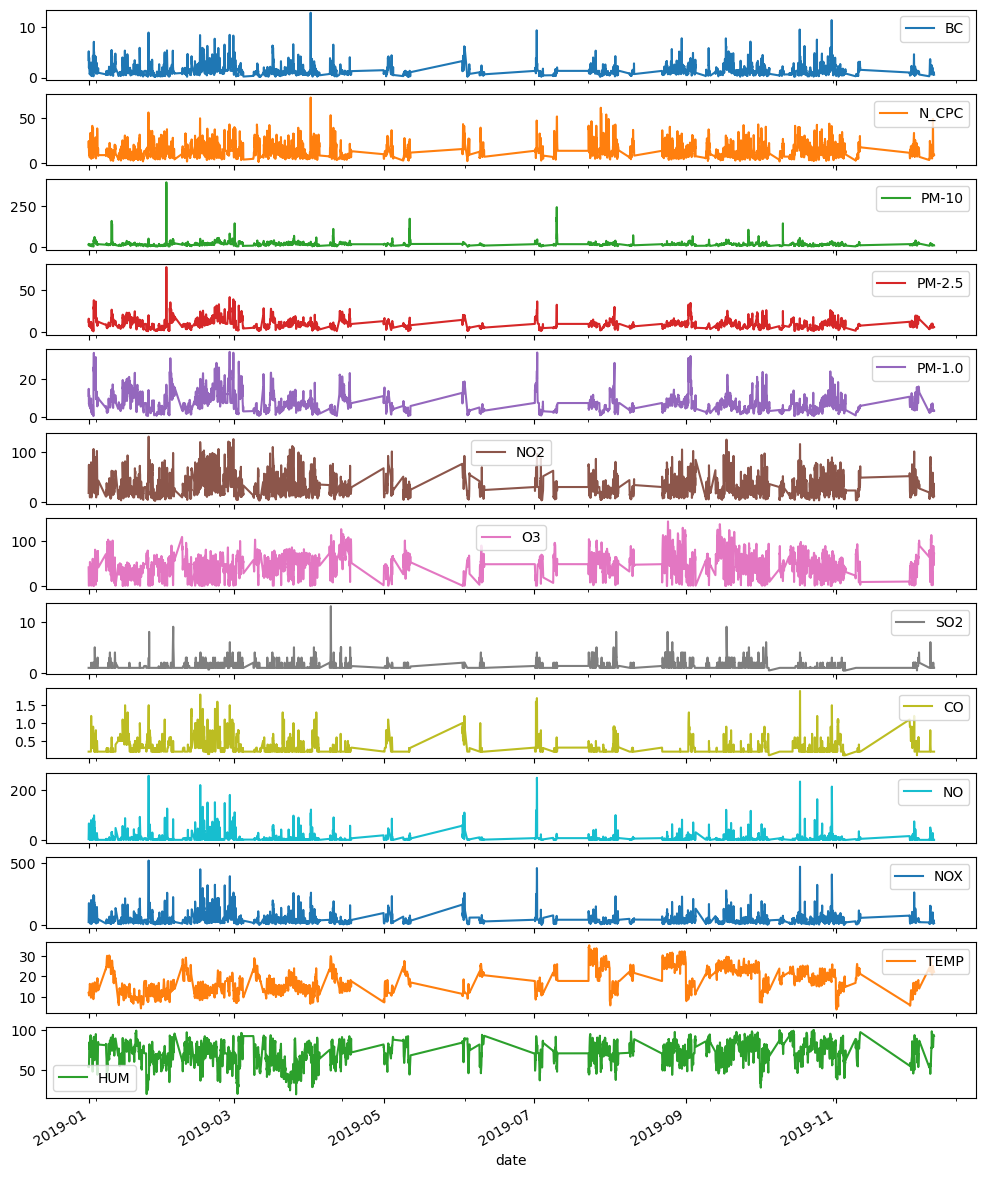

In [34]:
# Plot the time series data
data.plot(subplots=True, figsize=(12, 16))
plt.show()

threshold = 5 # theshold a little high to retain some outliers
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers = (z_scores > threshold).any(axis=1)
for column in data.columns:
    column_mean = data[column].mean()
    data.loc[outliers, column] = column_mean
data.plot(subplots=True, figsize=(12, 16))
plt.show()

In [35]:
data.describe()

,BC,N_CPC,PM-10,PM-2.5,PM-1.0,NO2,O3,SO2,CO,NO,NOX,TEMP,HUM
count,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000
mean,1.309108,13.661508,15.158237,9.301489,7.257332,30.106000,48.070346,1.370919,0.313534,7.915068,41.861151,17.834635,70.795347
std,1.078665,7.922617,13.711135,5.860873,5.274505,20.964324,25.101155,0.769465,0.203886,17.941212,43.866719,5.888538,14.583073
min,0.110000,1.376000,0.600000,0.500000,0.333000,2.000000,1.000000,0.500000,0.100000,0.500000,1.000000,4.083000,19.383000
25%,0.682000,8.003000,8.985137,5.317000,3.383000,15.000000,32.000000,1.000000,0.200000,1.000000,18.000000,13.050000,61.500000
50%,1.031000,12.175500,13.475000,8.333000,6.233000,25.000000,48.138797,1.000000,0.200000,3.000000,30.000000,17.724305,70.860193
75%,1.452750,17.009250,17.954250,11.600000,9.217000,38.000000,63.000000,1.526344,0.312924,7.000000,47.000000,22.367000,82.158250
max,12.767000,73.490000,398.717000,76.833000,34.383000,132.000000,142.000000,13.000000,1.900000,255.000000,521.000000,34.983000,100.000000


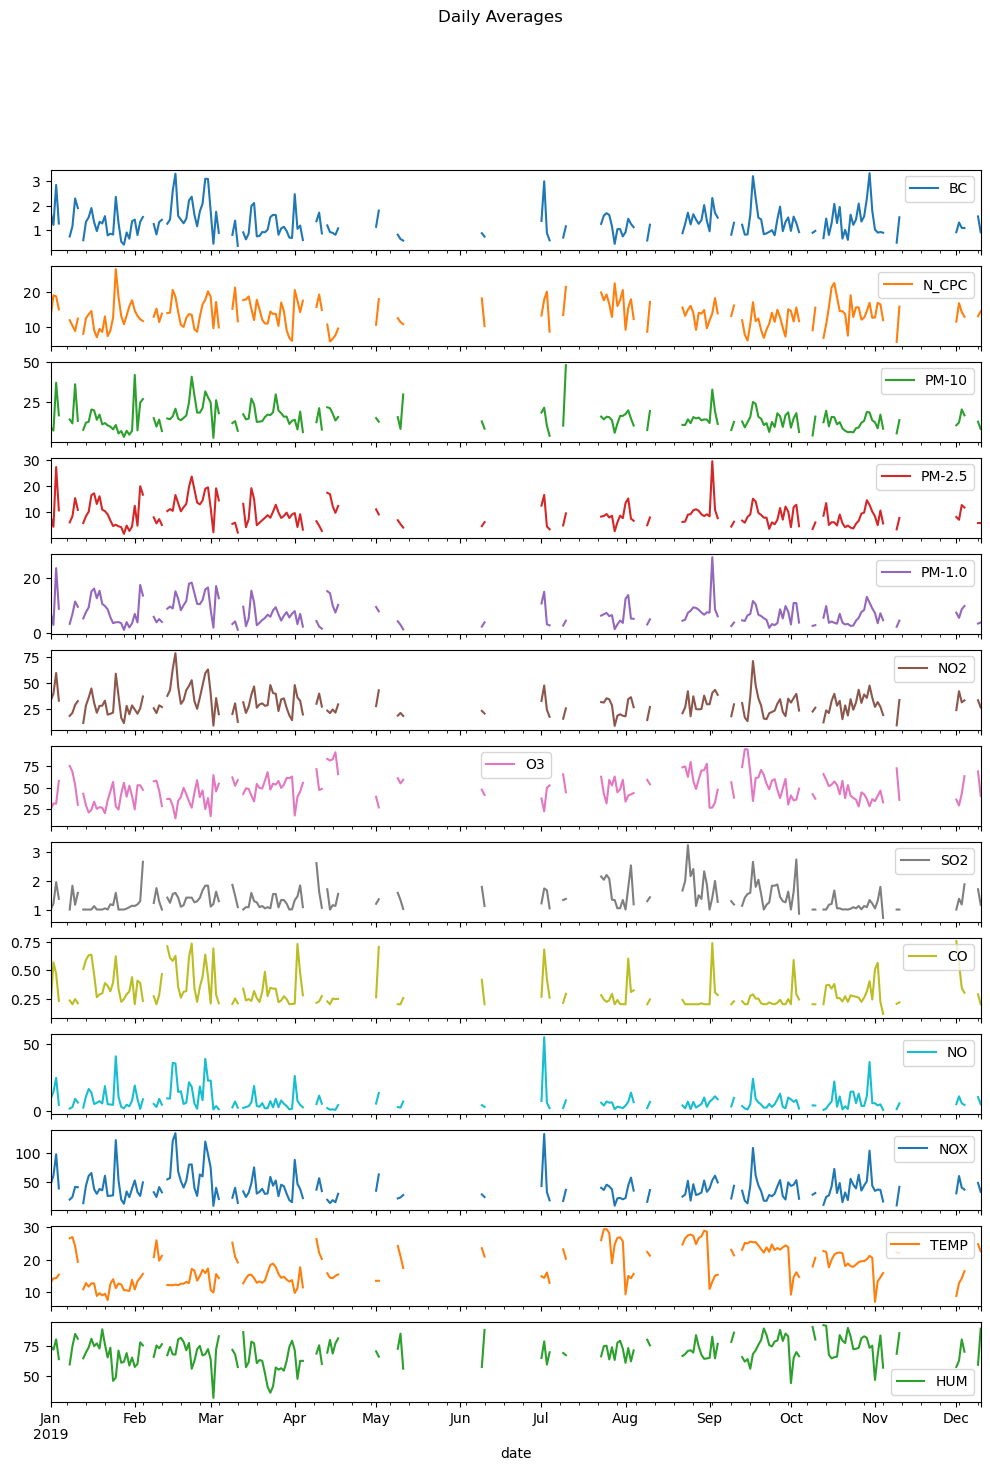

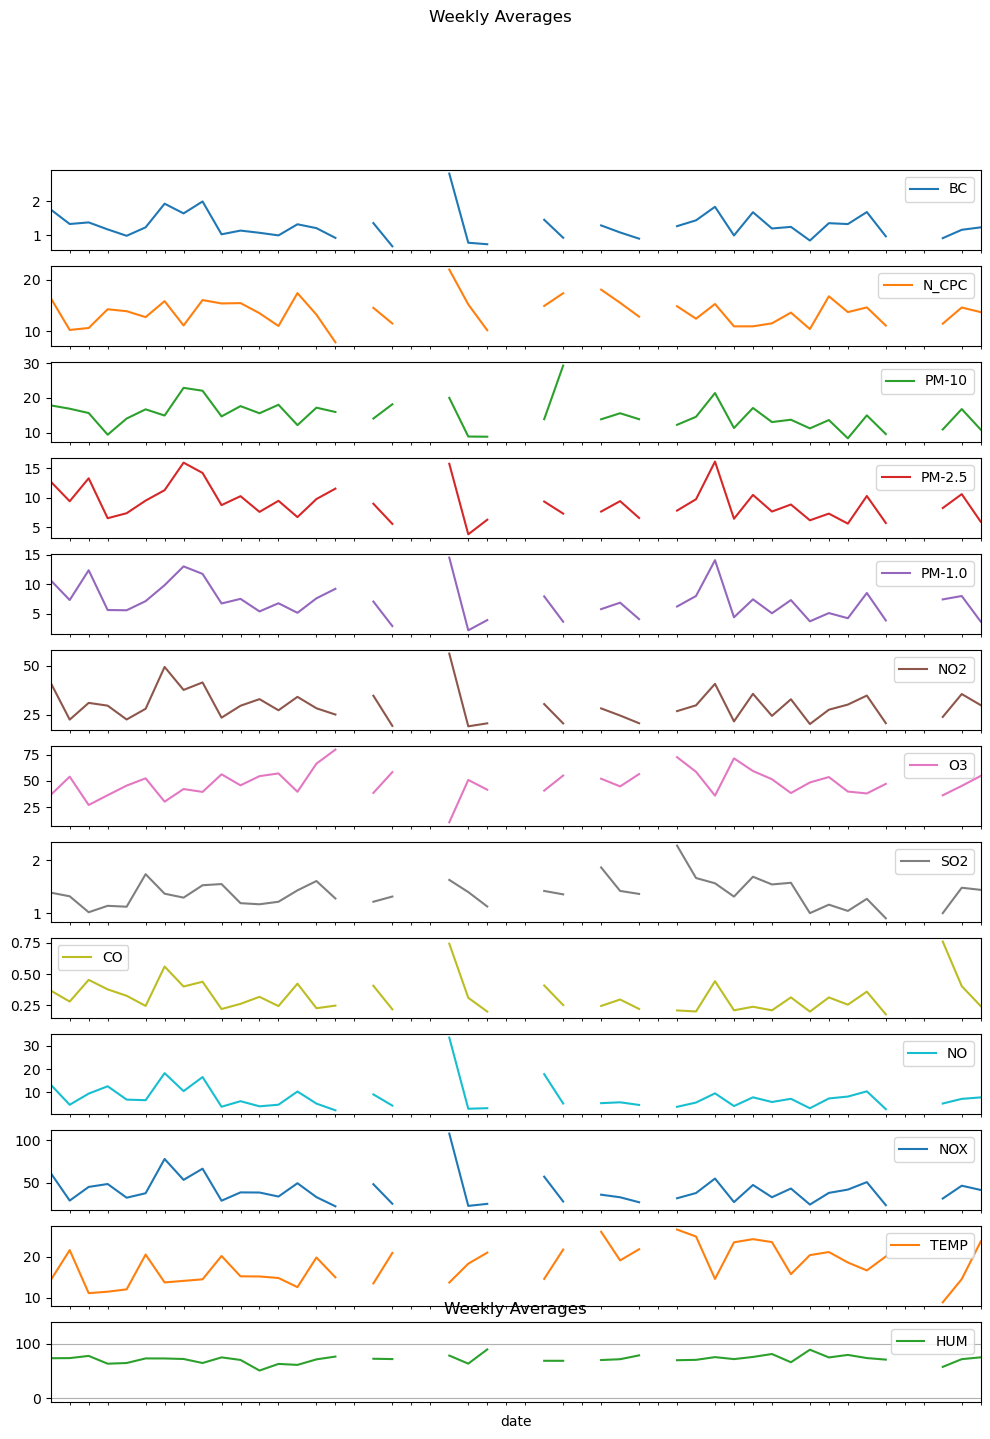

In [36]:
# Daily averages
daily_data = data.resample('D').mean()

# Weekly averages
weekly_data = data.resample('W').mean()

# Visualize the daily and weekly trends using line charts
daily_data.plot(subplots=True, figsize=(12, 16), title='Daily Averages')
weekly_data.plot(subplots=True, figsize=(12, 16), title='Weekly Averages')

# Visualize the daily and weekly trends using box plots
daily_data.boxplot(figsize=(12, 7))
plt.title('Daily Averages')
weekly_data.boxplot(figsize=(12, 7))
plt.title('Weekly Averages')

plt.show()

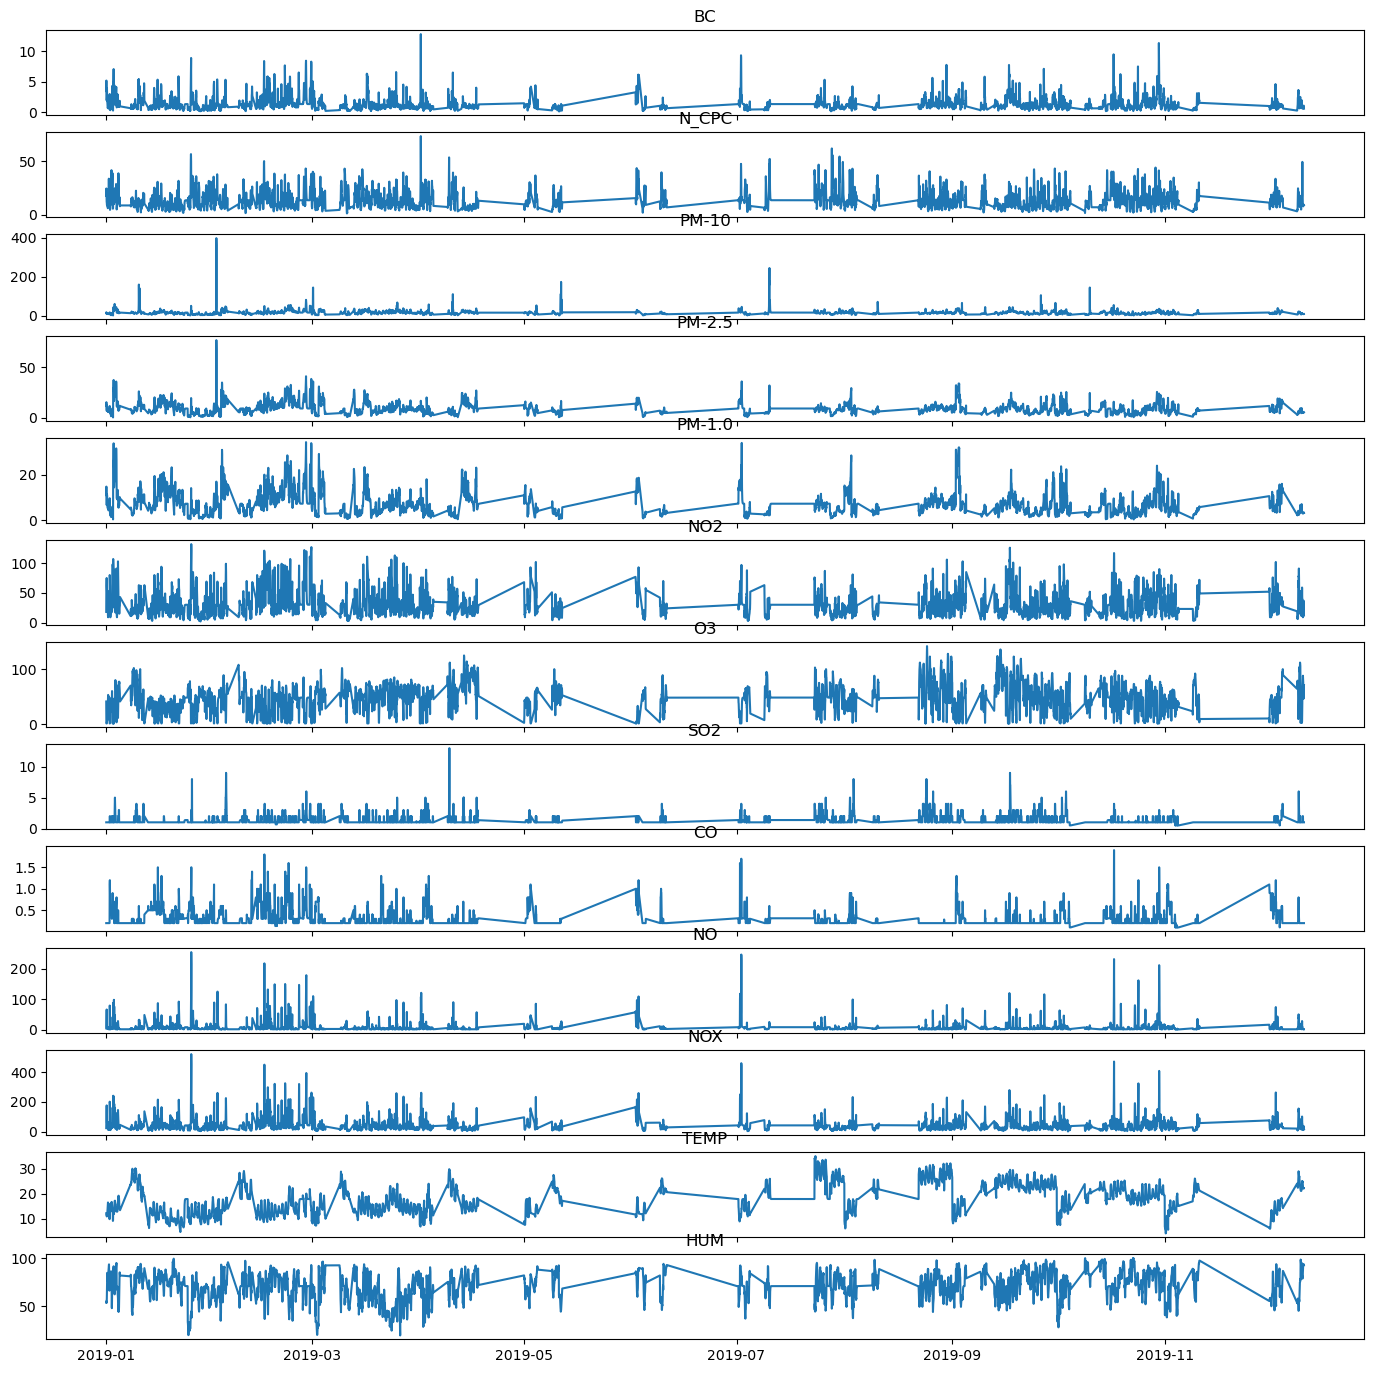

In [37]:
def inspect_dataframe(df, columns):
    figs, axs = plt.subplots(len(columns), 1, sharex=True, figsize=(17,17))
    for i, col in enumerate(columns):
        axs[i].plot(df[col])
        axs[i].set_title(col)
    plt.show()
inspect_dataframe(data, data.columns)

(3984, 13) (600, 13)


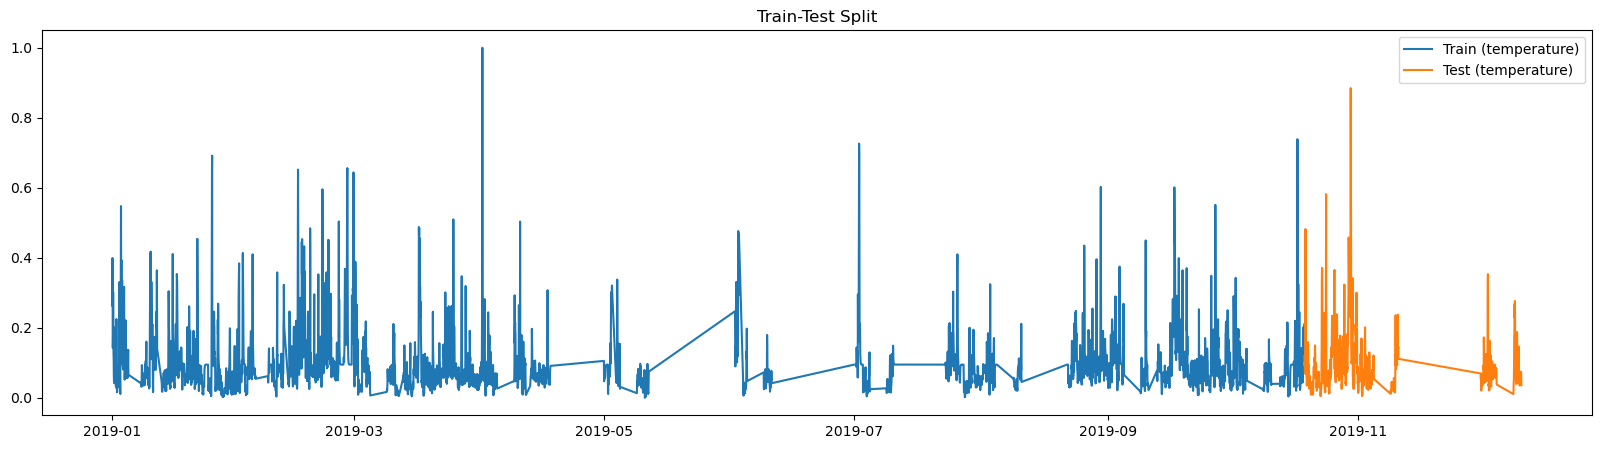

In [38]:
test_size = 24*25

X_train_raw = data.iloc[:-test_size]
# y_train_raw = y.iloc[:-test_size]
X_test_raw = data.iloc[-test_size:]
# y_test_raw = y.iloc[-test_size:]
print(X_train_raw.shape, X_test_raw.shape)

# Normalize both features and labels
X_min = X_train_raw.min()
X_max = X_train_raw.max()

X_train_raw = (X_train_raw-X_min)/(X_max-X_min)
X_test_raw = (X_test_raw-X_min)/(X_max-X_min)

plt.figure(figsize=(20,5))
plt.plot(X_train_raw.BC, label='Train (temperature)')
plt.plot(X_test_raw.BC, label='Test (temperature)')
plt.title('Train-Test Split')
plt.legend()
plt.show()

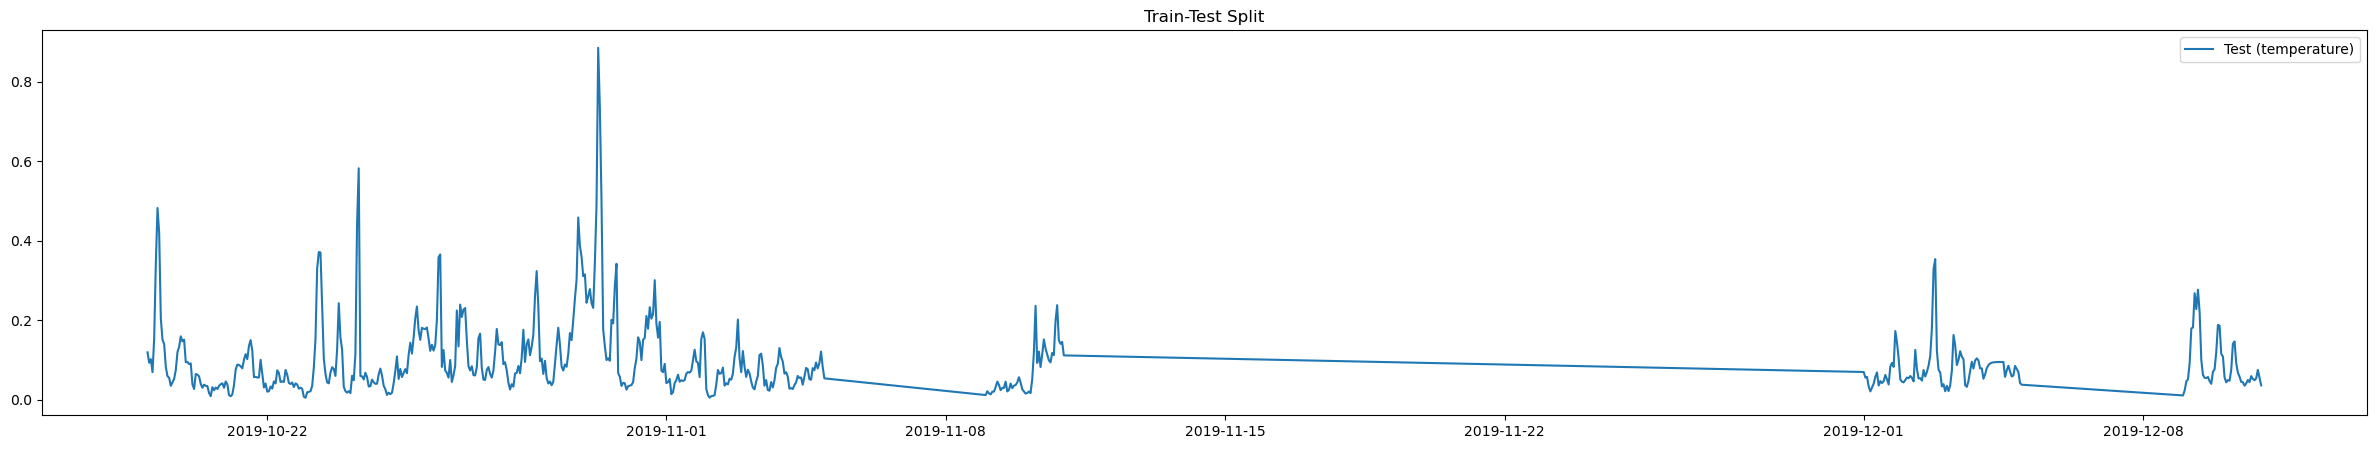

In [39]:
plt.figure(figsize=(30,5))
plt.plot(X_test_raw.BC, label='Test (temperature)')
plt.title('Train-Test Split')
plt.legend()
plt.show()

In [19]:

# Load the second CSV dataset
df2 = pd.read_csv('filled.csv')

# Find the indices of missing rows
missing_indices = data[~data.isin(df2.to_dict(orient='list')).all(axis=1)].index.tolist()

print(missing_indices)


[Timestamp('2019-01-17 16:00:00'), Timestamp('2019-01-17 15:00:00'), Timestamp('2019-01-23 11:00:00'), Timestamp('2019-01-23 12:00:00'), Timestamp('2019-01-23 13:00:00'), Timestamp('2019-01-23 14:00:00'), Timestamp('2019-01-23 15:00:00'), Timestamp('2019-01-23 16:00:00'), Timestamp('2019-01-23 17:00:00'), Timestamp('2019-01-23 18:00:00'), Timestamp('2019-01-23 19:00:00'), Timestamp('2019-01-23 20:00:00'), Timestamp('2019-01-23 21:00:00'), Timestamp('2019-01-23 22:00:00'), Timestamp('2019-01-23 23:00:00'), Timestamp('2019-01-24 00:00:00'), Timestamp('2019-01-24 01:00:00'), Timestamp('2019-01-24 02:00:00'), Timestamp('2019-01-24 03:00:00'), Timestamp('2019-01-24 04:00:00'), Timestamp('2019-01-24 05:00:00'), Timestamp('2019-01-24 06:00:00'), Timestamp('2019-01-24 07:00:00'), Timestamp('2019-01-24 08:00:00'), Timestamp('2019-01-24 09:00:00'), Timestamp('2019-01-29 11:00:00'), Timestamp('2019-01-29 12:00:00'), Timestamp('2019-01-29 13:00:00'), Timestamp('2019-01-31 12:00:00'), Timestamp('20

In [20]:
missing_hour

12